In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
# read the data and speficify the predictive variables
# specify the target column name
data = pd.read_csv('day.csv')
data.head()
target = 'cnt'

## Hypothesis Function

$$
h_{\theta}(\boldsymbol{X}) = \boldsymbol{X}\boldsymbol{\theta}
$$

where 
$$
\boldsymbol{X}=\left(\begin{array}{ccccc}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1, d} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2, d} \\
1 & \vdots & \vdots & \vdots & \vdots \\
1 &x_{n, 1} & x_{n, 2} & \cdots & x_{n, d}
\end{array}\right)
$$

## Loss Function

$$
J(\boldsymbol{\theta}) = \frac{1}{2m}(\boldsymbol{X}\boldsymbol{\theta}-\boldsymbol{y})^\top(\boldsymbol{X}\boldsymbol{\theta}-\boldsymbol{y})
$$


In [3]:
def loss_function(X, y, theta):
    
    """
    Calculate the loss for the model.
    
    Parameters:
    -------------
    X: input variables
    y: output
    theta: estimators
    
    Returns:
    -------------
    loss: the loss based on your current estimators
    error: the difference between the true outcome and your predicted outcome
    """
    # start your code
    m = y.size
    error = np.dot(X, theta.T)-y
    loss = 1/(2*m)*np.dot(error.T, error)
    # end your code
    return loss, error

## Gradient Descent

Repeat until Convergence $\{
      \theta_j=\theta_j-\frac{\alpha}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y{(i)})\cdot x_{j}^{(i)}\}$ for 
      $j=0,1,\dots,n$.

In [15]:
def gradient_descent(X, y, theta, alpha, iters):
    """
    Taking the Gradient Descent to find the optimal solution.
    
    Parameters:
    -------------
    X: input variables
    y: output
    theta: current estimators
    alpha: learning rate
    iters: number of iterations (n)
    
    Returns:
    -------------
    theta: updated estimators after n iterations
    loss: updated loss after n iterations
    """
    
    # start your code
    new_loss = np.zeros(iters)
    new_theta = theta
    m = y.size
    for i in range(iters):
        loss, error = loss_function(X, y, new_theta)
        new_loss[i] = loss
        new_theta = new_theta - (alpha*(1/m)*np.dot(X.T, error))
    # end your code
    return new_theta, new_loss

In [16]:
# Define the input and the output
X_prime = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 
      'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].to_numpy()
X = np.concatenate((np.ones((X_prime.shape[0], 1)), X_prime), axis=1)
y = data['cnt'].to_numpy()

In [17]:
# Define the hyper parameters
alpha = 1e-4
iterations = 1000

In [18]:
# Initialise the estimators
theta = np.zeros(X.shape[1])

In [19]:
# Calculate the initial loss
initial_loss = loss_function(X, y, theta)[0]

In [20]:
print('With initial theta values of {0}, loss is {1}'.format(theta, initial_loss))

With initial theta values of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], loss is 12018406.44117647


In [21]:
# Take the Gradient Descent
theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)

In [22]:
final_loss = loss_function(X, y, theta)[0]

In [23]:
print('With final theta values of {0}, cost loss is {1}'.format(theta, final_loss))

With final theta values of [ 98.89587438 204.76057175 103.15154147 369.94740333   1.0552504
 244.02027102  71.49833306 100.57657362  65.13853771  61.28136835
  54.92005042  17.50932803], cost loss is 2194787.4751319485


In [24]:
# Plot the learning curve
def plot_lc(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'b')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.set_title('Learning curve')
    plt.show()

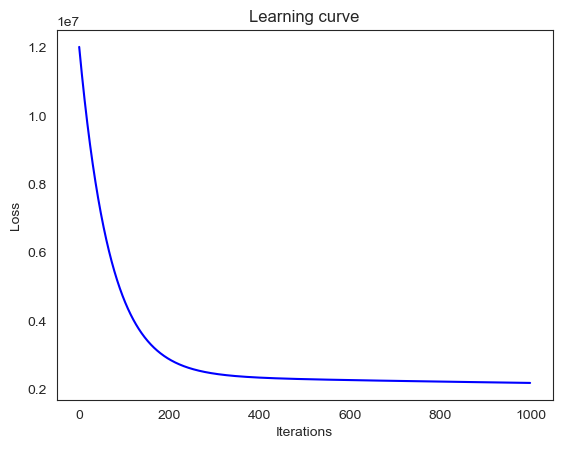

In [25]:
plot_lc(iterations, cost_num)

In [26]:
def plotRes(residuals, y_pred):
    data = pd.DataFrame({
        'Predicted Values': y_pred,
        'Residuals': residuals
    })
    plt.figure()
    sns.jointplot(x='Predicted Values', y='Residuals', data=data)

    plt.show()

<Figure size 640x480 with 0 Axes>

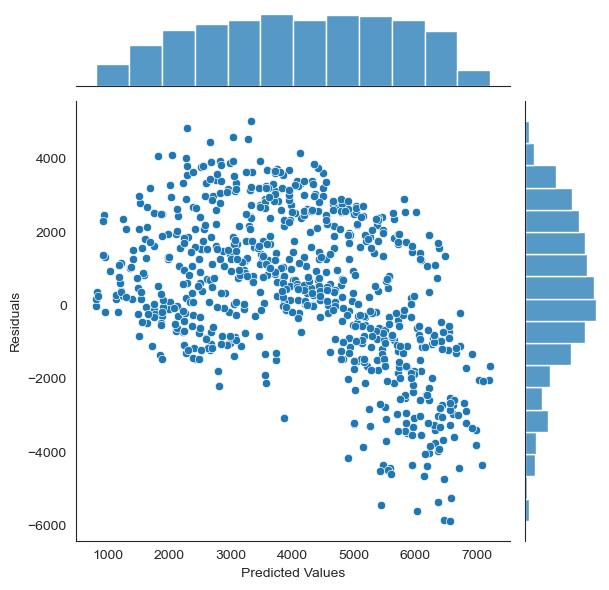

In [29]:
# plot the residuals vs predicted values
y_pred = X @ theta
residuals = y - y_pred
plotRes(residuals, y_pred)


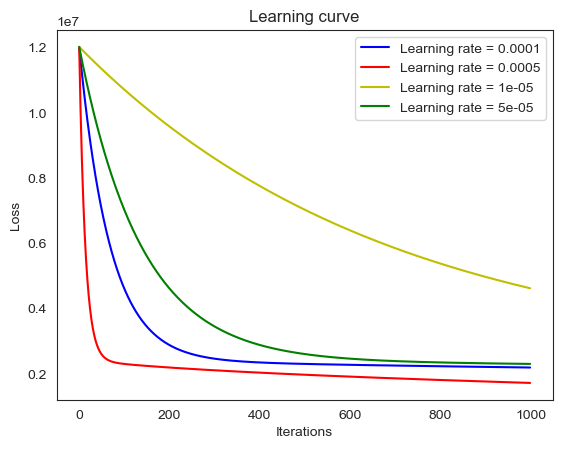

In [30]:
lr_list = [1e-4, 5e-4, 1e-5, 5e-5]
c_list = ['b', 'r', 'y', 'g']
iterations = 1000
fig, ax = plt.subplots()
for i, lr in enumerate(lr_list):
    alpha = lr
    theta = np.zeros(X.shape[1])
    initial_loss = loss_function(X, y, theta)[0]
    theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)
    final_loss = loss_function(X, y, theta)[0]
    ax.plot(np.arange(iterations), cost_num, c_list[i], label='Learning rate = {}'.format(alpha))
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Learning curve')
ax.legend()
plt.show()